In [132]:
import numpy as np
import pandas as pd
import math
from scipy.optimize import minimize
import scipy.stats as st
from scipy.special import digamma
from scipy.special import gammaln
from scipy.special import polygamma

In [133]:
from scipy.stats import multivariate_t

In [134]:
from numpy.linalg import inv
from numpy.linalg import det

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
# Semente para o Gerador de números aleatórios
semente = 101
np.random.seed(semente)

In [137]:
mu = np.array([0 , 0, 0, 0])
mu.shape

(4,)

In [138]:
Sigma = np.matrix([[1, 0, 0, 0],
                   [0, 2, 0, 0],
                   [0, 0, 3, 0],
                   [0, 0, 0, 4]], dtype = float)
Sigma.shape

(4, 4)

In [139]:
# df = \nu ?
df = 3

In [140]:
multi_t = multivariate_t(mu, Sigma, df=df)

In [141]:
anos = 10
observacoes = 12* anos

In [142]:
y = multivariate_t.rvs(loc=mu, shape=Sigma, df=3, size=observacoes, random_state=semente)

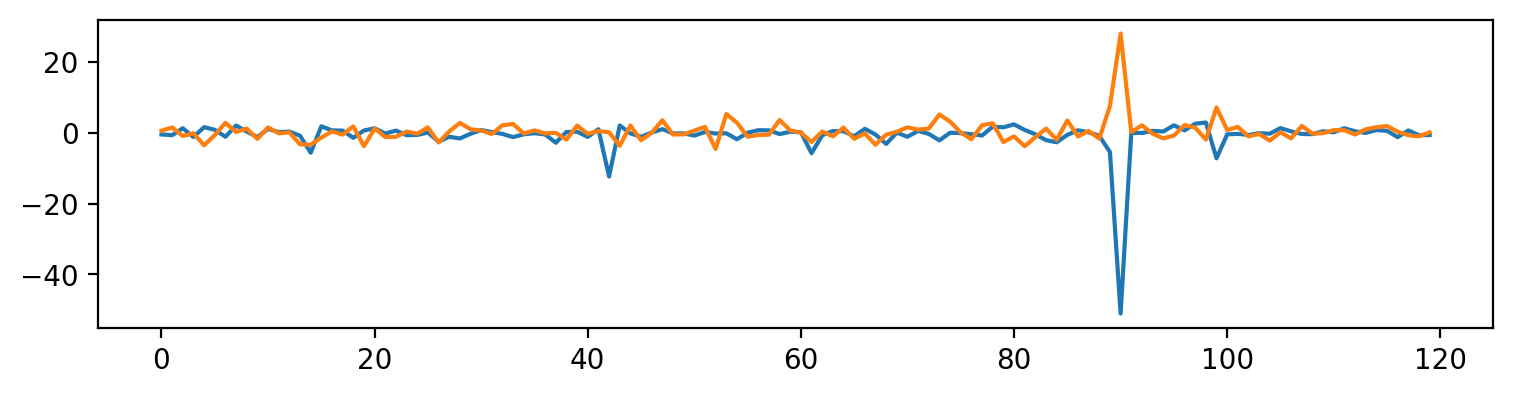

In [143]:
plt.figure(figsize=(9,2), dpi = 200)
plt.plot(y[:,0]);
plt.plot(y[:,1]);

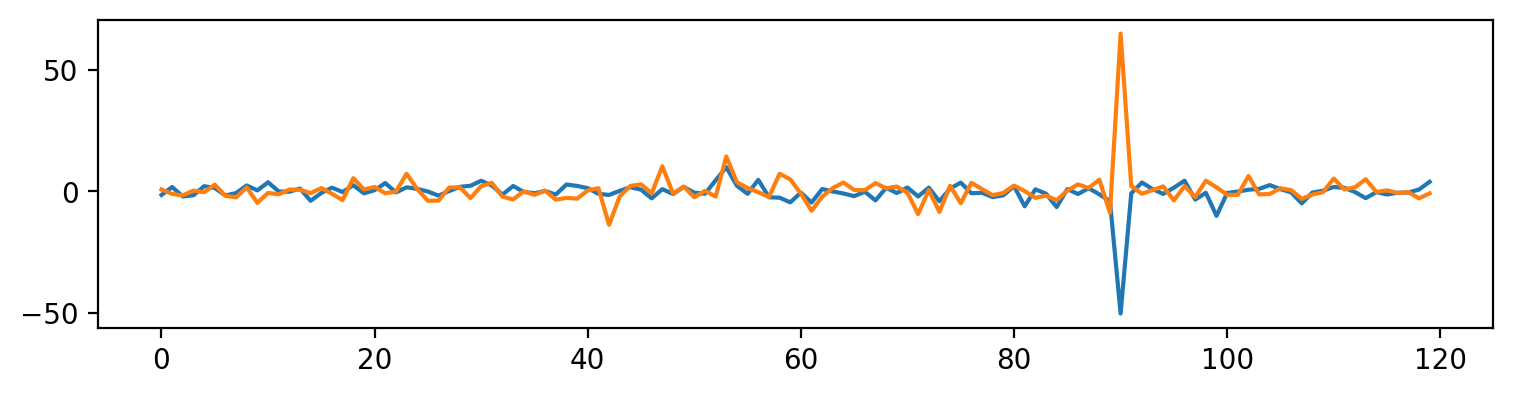

In [144]:
plt.figure(figsize=(9,2), dpi = 200)
plt.plot(y[:,2]);
plt.plot(y[:,3]);

In [145]:
def LV_MtPDF(parametros, serie):
    """
    considerando matriz Sigma simétrica => reduzimos # de parâmetros a estimar.

    """
    # df cte.
    df = 3
    mu  = np.array([parametros[0], parametros[1], parametros[2], parametros[3]])
    Sigma = np.matrix([ [parametros[4], parametros[5], parametros[6],   parametros[7]  ],
                        [parametros[5], parametros[8], parametros[9],   parametros[10] ],
                        [parametros[6], parametros[9], parametros[11],  parametros[12] ],
                        [parametros[7], parametros[10], parametros[12], parametros[13] ] ], dtype = float)

    #print(mu)
    #print(Sigma)

    T = len(serie)
    p0 = 0

    T = len(serie)
    p0 = 0
    for i in range(T):
        p0 = p0 +  multivariate_t.logpdf(y[i], loc=mu, shape=Sigma, df=df)

    LV = p0
    #print(-LV)
    return -LV

In [146]:
multivariate_t.logpdf([0,0,0,0], loc=mu, shape=Sigma, df=df)
#y[0]

-4.753955424226673

In [147]:
LV_MtPDF([0,0,0,0, 1,0,0,0, 2,0,0, 3,0, 4] , y)

1047.61619563884

In [ ]:
# Minimização com restrições
valmu_0 = 0.1
mu_0 = np.array([valmu_0, valmu_0, valmu_0, valmu_0 ])

Sigma_0_11 = 1
Sigma_0_22 = 2
Sigma_0_33 = 3
Sigma_0_44 = 4

Sigma_0_12, Sigma_0_13, Sigma_0_14 = 0, 0, 0
Sigma_0_21, Sigma_0_23, Sigma_0_24 = Sigma_0_12, 0, 0
Sigma_0_31, Sigma_0_32, Sigma_0_34 = Sigma_0_13, Sigma_0_23, 0
Sigma_0_41, Sigma_0_42, Sigma_0_43 = Sigma_0_14, Sigma_0_24, Sigma_0_34

Sigma_0 = np.matrix([[Sigma_0_11, Sigma_0_12, Sigma_0_13, Sigma_0_14],
                     [Sigma_0_21, Sigma_0_22, Sigma_0_23, Sigma_0_24],
                     [Sigma_0_31, Sigma_0_32, Sigma_0_33, Sigma_0_34],
                     [Sigma_0_41, Sigma_0_42, Sigma_0_43, Sigma_0_44]], dtype = float)
vmin = 0
vmax = 50
print("Valor inicial de mu: ", mu_0)
print("Valor iniciais de Sigma: ", Sigma_0)
opt = {'maxfev': 50_000, 'disp': False, 'xatol': 1e-6, 'fatol': 1e-6, 'adaptive': True}
mle_model = minimize(LV_MtPDF, [mu_0[0], mu_0[1], mu_0[2], mu_0[3],
                                Sigma_0[0,0], Sigma_0[0,1], Sigma_0[0,2], Sigma_0[0,3],
                                              Sigma_0[1,1], Sigma_0[1,2], Sigma_0[1,3],
                                                            Sigma_0[2,2], Sigma_0[2,3],
                                                                          Sigma_0[3,3]] , args = (y,),
                              bounds = ((-vmax, vmax), (-vmax, vmax),(-vmax, vmax), (-vmax, vmax),
                                        (vmin, vmax),(vmin, vmax),(vmin, vmax),(vmin, vmax),
                                                    (vmin, vmax),(vmin, vmax),(vmin, vmax),
                                                                 (vmin, vmax),(vmin, vmax),
                                                                              (vmin, vmax)),
                              method = 'Nelder-Mead', options= opt)

print(mle_model)

Valor inicial de mu:  [0.1 0.1 0.1 0.1]
Valor iniciais de Sigma:  [[1. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 4.]]


In [ ]:
# Recupera Solução
mu_est = np.array([mle_model.x[0], mle_model.x[1], mle_model.x[2], mle_model.x[3]])
Sigma_est = np.matrix([ [mle_model.x[4], mle_model.x[5],  mle_model.x[6],  mle_model.x[7]  ],
                        [mle_model.x[5], mle_model.x[8],  mle_model.x[9],  mle_model.x[10] ],
                        [mle_model.x[6], mle_model.x[9],  mle_model.x[11], mle_model.x[12] ],
                        [mle_model.x[7], mle_model.x[10], mle_model.x[12], mle_model.x[13] ] ], dtype = float)

mu_est, Sigma_est

In [ ]:
def LV_Mt(parametros, serie):
    """
    considerando matriz Sigma simétrica => reduzimos # de parâmetros a estimar.
    """
    # df cte.
    df = 3
    nu = df

    mu  = np.array([parametros[0], parametros[1], parametros[2], parametros[3]])
    Sigma = np.matrix([ [parametros[4], parametros[5], parametros[6],   parametros[7]  ],
                        [parametros[5], parametros[8], parametros[9],   parametros[10] ],
                        [parametros[6], parametros[9], parametros[11],  parametros[12] ],
                        [parametros[7], parametros[10], parametros[12], parametros[13] ] ], dtype = float)

    #print(mu)
    #print(Sigma)

    # Dimensão de mu
    k = mu.shape[0]

    #print(mu)
    #print(Sigma)

    T = len(serie)
    p0 = 0

    T = len(serie)
    p0 = 0
    for i in range(T):
        p0 = p0 - 1/2 *np.log(det(Sigma)) - (nu+k)/2 * np.log(1 + np.dot(np.dot((y[i]-mu).T,inv(Sigma)),(y[i]-mu))/nu)
        #p0 = p0  - 1/2 *np.log(det(Sigma)) - (nu+k)/2 * np.log(1 + ((y[i]-mu).T@inv(Sigma)@(y[i]-mu))/nu)

    LV =  T*(gammaln((nu+k)/2) - gammaln(nu/2) - k/2* np.log(np.pi*nu)) + p0

    #print(-LV.item())
    return -LV.item()

In [ ]:
#a = 100
#b = 0.1
#LV_MtPDF([a,b,10,1,1,30], y),LV_MtPDF([a,b,10,1,1,30], y)

In [ ]:
# Minimização com restrições
valmu_0 = 0.1
mu_0 = np.array([valmu_0, valmu_0, valmu_0, valmu_0 ])

Sigma_0_11 = 1
Sigma_0_22 = 2
Sigma_0_33 = 3
Sigma_0_44 = 4

Sigma_0_12, Sigma_0_13, Sigma_0_14 = 0, 0, 0
Sigma_0_21, Sigma_0_23, Sigma_0_24 = Sigma_0_12, 0, 0
Sigma_0_31, Sigma_0_32, Sigma_0_34 = Sigma_0_13, Sigma_0_23, 0
Sigma_0_41, Sigma_0_42, Sigma_0_43 = Sigma_0_14, Sigma_0_24, Sigma_0_34

Sigma_0 = np.matrix([[Sigma_0_11, Sigma_0_12, Sigma_0_13, Sigma_0_14],
                     [Sigma_0_21, Sigma_0_22, Sigma_0_23, Sigma_0_24],
                     [Sigma_0_31, Sigma_0_32, Sigma_0_33, Sigma_0_34],
                     [Sigma_0_41, Sigma_0_42, Sigma_0_43, Sigma_0_44]], dtype = float)
vmin = 0
vmax = 50
print("Valor inicial de mu: ", mu_0)
print("Valor iniciais de Sigma: ", Sigma_0)
opt = {'maxfev': 50_000, 'disp': False, 'xatol': 1e-6, 'fatol': 1e-6, 'adaptive': True}
mle_model = minimize(LV_Mt, [mu_0[0], mu_0[1], mu_0[2], mu_0[3],
                                Sigma_0[0,0], Sigma_0[0,1], Sigma_0[0,2], Sigma_0[0,3],
                                              Sigma_0[1,1], Sigma_0[1,2], Sigma_0[1,3],
                                                            Sigma_0[2,2], Sigma_0[2,3],
                                                                          Sigma_0[3,3]] , args = (y,),
                              bounds = ((-vmax, vmax), (-vmax, vmax),(-vmax, vmax), (-vmax, vmax),
                                        (vmin, vmax),(vmin, vmax),(vmin, vmax),(vmin, vmax),
                                                    (vmin, vmax),(vmin, vmax),(vmin, vmax),
                                                                 (vmin, vmax),(vmin, vmax),
                                                                              (vmin, vmax)),
                              method = 'Nelder-Mead', options= opt)

print(mle_model)

In [ ]:
# Recupera Solução
mu_est = np.array([mle_model.x[0], mle_model.x[1], mle_model.x[2], mle_model.x[3]])
Sigma_est = np.matrix([ [mle_model.x[4], mle_model.x[5],  mle_model.x[6],  mle_model.x[7]  ],
                        [mle_model.x[5], mle_model.x[8],  mle_model.x[9],  mle_model.x[10] ],
                        [mle_model.x[6], mle_model.x[9],  mle_model.x[11], mle_model.x[12] ],
                        [mle_model.x[7], mle_model.x[10], mle_model.x[12], mle_model.x[13] ] ], dtype = float)

mu_est, Sigma_est